# Logistic Regression classification
Logistic regression is a predictive modelling technique in modelling binary categorical variables. The function of logistic regression that adopt ```sigmoid``` as activation function is $\ P(W^tx+b) = \frac{1}{1 + e^{-w^tx+b}}$. It's is a linear regression fuction $\ f(x) = Wx+b$ as a input param of ```sigmoid``` function. ```sigmoid``` will transform the prediction  $y $ into boundry 0 to 1 representing the probability of the category.

### Why not linear regression
If the problem is binary classification problem. Linear regression will result in y not within 0 to 1 boundary. Logistic regression can show the probability of the occurence for each event.

### Application
* Spam Detection
* Credit Card Fraud or not

### Sample
Here I implement minst hand writing classification with ```tf.keras``` API to classify picture and it's category.

### Discussion
* How to choose between ```softmax``` or ```sigmoid``` as the activation funciton.
* Type of cross entropy
* Variable (feature) have to be independent

### Reference
* https://www.tensorflow.org/tutorials/keras/classification
* https://corochann.com/mnist-dataset-introduction-1138.html
* https://www.tensorflow.org/tutorials/quickstart/beginner
* https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/
* https://www.theclassroom.com/disadvantages-logistic-regression-8574447.html


In [26]:
from __future__ import absolute_import, division, print_function, unicode_literals

# load tensorboard visualization tool
%load_ext tensorboard

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import datetime, os
from tensorflow.keras import layers


# set the float print only 4 decimal 
np.set_printoptions(precision=4)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [27]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# set each data between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)

(60000, 28, 28)


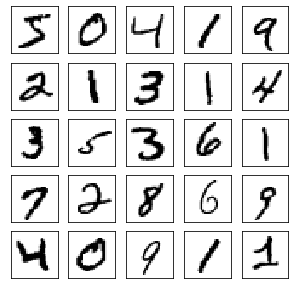

In [28]:
# print first 25 handwriting picture
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [29]:
# Create tensorboard meta data
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
'''
  Initialize layers parameter
'''

def build_model():
    # Here layers.Dense(10,...). 10 means the output will be a list of 10
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(10, activation = 'softmax', input_dim = x_train.shape[1], use_bias=True)
    ])

    optimizer = tf.keras.optimizers.SGD(0.001)

    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

    return model

model = build_model()

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
'''
  Train the model
'''

EPOCHS = 5

# The param"verbose": Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, verbose=2,
  callbacks=[tensorboard_callback])


Train on 60000 samples
Epoch 1/5
60000/60000 - 9s - loss: 1.7299 - accuracy: 0.5439
Epoch 2/5
60000/60000 - 7s - loss: 1.0710 - accuracy: 0.7920
Epoch 3/5
60000/60000 - 7s - loss: 0.8421 - accuracy: 0.8267
Epoch 4/5
60000/60000 - 6s - loss: 0.7275 - accuracy: 0.8427
Epoch 5/5
60000/60000 - 7s - loss: 0.6578 - accuracy: 0.8520


In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.5563 - accuracy: 0.8672

Test accuracy: 0.8672


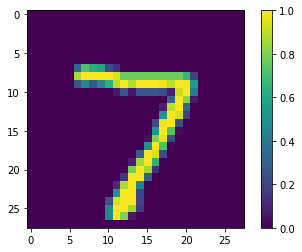

In [33]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [34]:
# Get model predict result base on x_test data
predictions = model.predict(x_test)

In [35]:
num_probability = predictions[0]
highest_prob_index = np.argmax(num_probability)
true_result_index = y_test[0]
print("Guess number: ", highest_prob_index)
print("True value: ", true_result_index)

Guess number:  7
True value:  7


In [36]:
'''
 Helper function: print the prediction result and probability chart
 Ref: https://www.tensorflow.org/tutorials/keras/classification
'''
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label, img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


7


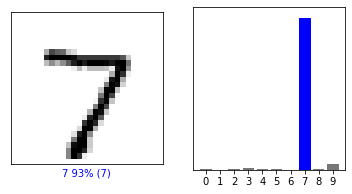

In [37]:
i = 0
print(y_test[i])
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test[i], x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test[i])
plt.show()

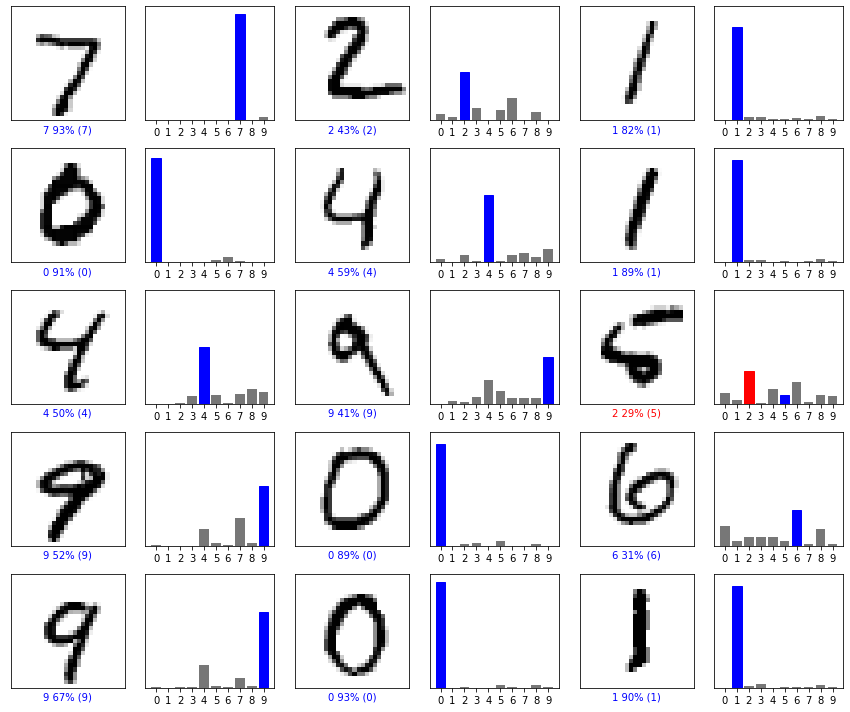

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test[i], x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test[i])
plt.tight_layout()
plt.show()